In [1]:
import matplotlib.pyplot as plt
plt.show()


## Pytorch HuggingFace

In [2]:
from transformers import *
import torch
from huggingface_utils import visual_atn, visual_atn_matrix

# Let's load our model
model = BertModel.from_pretrained('bert-base-uncased', output_attentions=True)  # pytorch

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

input_ids = [tokenizer.encode("Let's see all hidden-states and attentions on this text")]
tokens = [tokenizer.ids_to_tokens[id_] for id_ in input_ids[0]]

outputs = model(torch.tensor(input_ids))  # pytorch

# attention weights
loss, logits, attentions = outputs

I0322 19:30:20.363648 140132729755456 file_utils.py:35] PyTorch version 1.2.0 available.
I0322 19:30:21.925698 140132729755456 file_utils.py:48] TensorFlow version 2.0.0 available.
I0322 19:30:23.331181 140132729755456 configuration_utils.py:185] loading configuration file https://s3.amazonaws.com/models.huggingface.co/bert/bert-base-uncased-config.json from cache at /root/.cache/torch/transformers/4dad0251492946e18ac39290fcfe91b89d370fee250efe9521476438fe8ca185.8f56353af4a709bf5ff0fbc915d8f5b42bfff892cbb6ac98c3c45f481a03c685
I0322 19:30:23.333647 140132729755456 configuration_utils.py:199] Model config {
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "finetuning_task": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "is_decoder": false,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1
  },


## Tensorflow HuggingFace

In [2]:
from transformers import *
import tensorflow as tf
from huggingface_utils import visual_atn, visual_atn_matrix

# Let's load our model
model = TFBertModel.from_pretrained('bert-base-uncased', output_attentions=True)  # tensorflow

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

input_ids = [tokenizer.encode("Let's see all hidden-states and attentions on this text")]
tokens = [tokenizer.ids_to_tokens[id_] for id_ in input_ids[0]]

outputs = model(tf.constant(input_ids))  # tensorflow

# attention weights
loss, logits, attentions = outputs



I0320 10:51:17.312382 140705143949120 file_utils.py:35] PyTorch version 1.2.0 available.
I0320 10:51:18.968520 140705143949120 file_utils.py:48] TensorFlow version 2.0.0 available.
I0320 10:51:20.394514 140705143949120 configuration_utils.py:185] loading configuration file https://s3.amazonaws.com/models.huggingface.co/bert/bert-base-uncased-config.json from cache at /root/.cache/torch/transformers/4dad0251492946e18ac39290fcfe91b89d370fee250efe9521476438fe8ca185.8f56353af4a709bf5ff0fbc915d8f5b42bfff892cbb6ac98c3c45f481a03c685
I0320 10:51:20.396810 140705143949120 configuration_utils.py:199] Model config {
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "finetuning_task": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "is_decoder": false,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1
  },


## Visualize Attentions

In [3]:
# These two are the same
# DEFAULT: last layer, average over multi-heads, and average over the 0th axis of self-attention matrix 
print(visual_atn(tokens, attentions))
print(visual_atn(tokens, attentions, layer_num=-1, head_num='average', token_num='average', atn_axis=0))

(layer) -1 (batch) 0 (head) average (token_num) average (token) ALL_TOKENS (axis) 0
[CLS] let ' s see all hidden - states and attention ##s on this text [SEP] (0.02 0.10 0.18 0.26 0.34)
(layer) -1 (batch) 0 (head) average (token_num) average (token) ALL_TOKENS (axis) 0
[CLS] let ' s see all hidden - states and attention ##s on this text [SEP] (0.02 0.10 0.18 0.26 0.34)


In [4]:
print(visual_atn(tokens, attentions, use_absolute=True))

(layer) -1 (batch) 0 (head) average (token_num) average (token) ALL_TOKENS (axis) 0
[CLS] let ' s see all hidden - states and attention ##s on this text [SEP] (0.00 0.25 0.50 0.75 1.00) (min: 0.0156934075 max: 0.3407350779)


In [5]:
print(visual_atn(tokens, attentions, layer_num=3, head_num=-1, token_num=4))  # third layer, last head, fourth token (see)

(layer) 3 (batch) 0 (head) -1 (token_num) 4 (token) see (axis) 0
[CLS] let ' s see all hidden - states and attention ##s on this text [SEP] (0.00 0.10 0.20 0.30 0.40)


In [6]:
# In the last layer, what token is attended by / attends to [CLS] averagely over multiple heads?
print(visual_atn(tokens, attentions, layer_num=-1, head_num='average', token_num=0, atn_axis=0))
print(visual_atn(tokens, attentions, layer_num=-1, head_num='average', token_num=0, atn_axis=1))

(layer) -1 (batch) 0 (head) average (token_num) 0 (token) [CLS] (axis) 0
[CLS] let ' s see all hidden - states and attention ##s on this text [SEP] (0.02 0.05 0.08 0.11 0.13)
(layer) -1 (batch) 0 (head) average (token_num) 0 (token) [CLS] (axis) 1
[CLS] let ' s see all hidden - states and attention ##s on this text [SEP] (0.01 0.04 0.07 0.10 0.13)


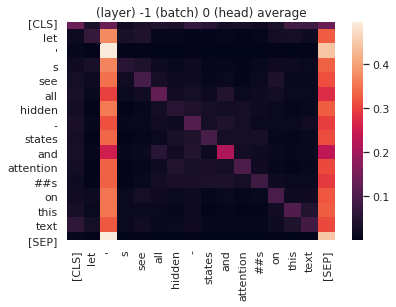

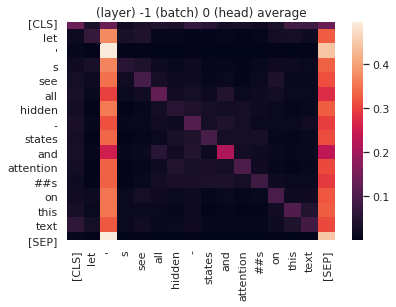

In [7]:
visual_atn_matrix(tokens, attentions)
plt.show()

# same as
visual_atn_matrix(tokens, attentions, layer_num=-1, head_num='average')  # last layer, average over multi-head attention matrices
plt.show()

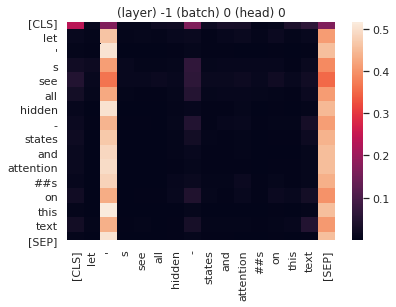

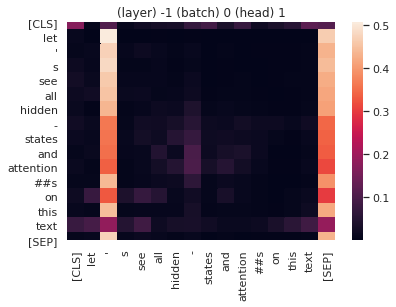

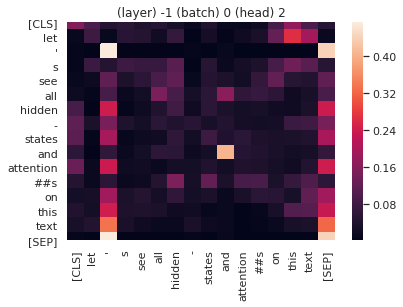

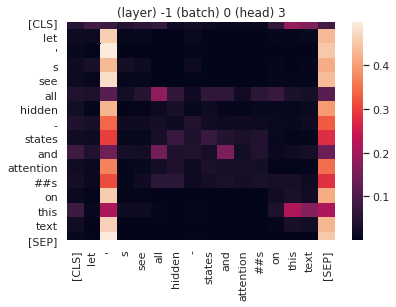

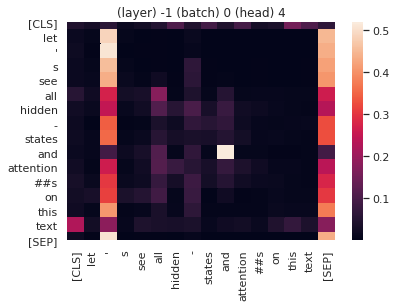

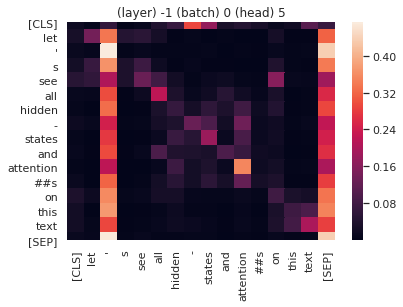

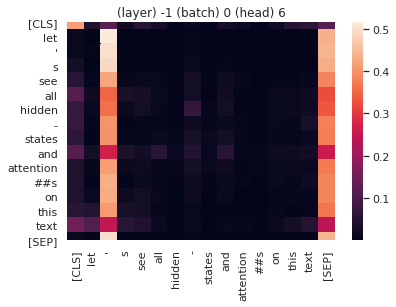

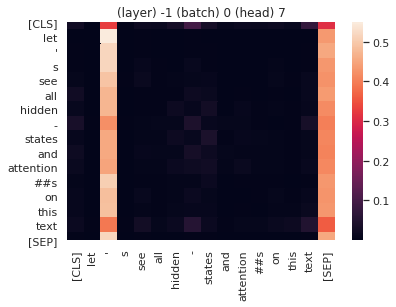

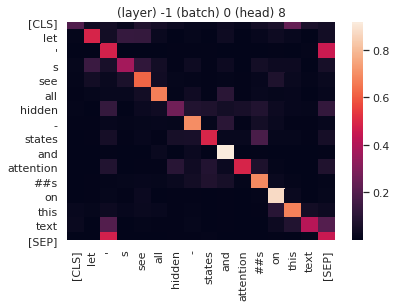

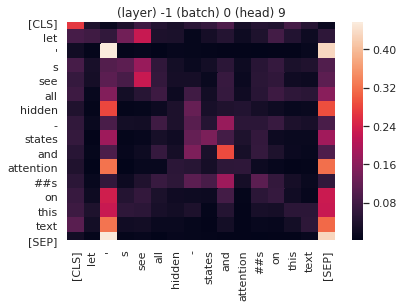

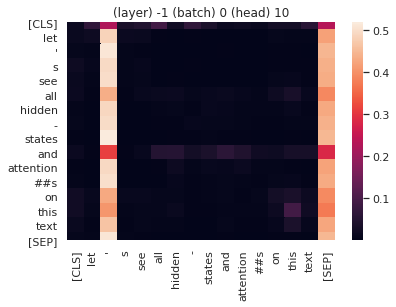

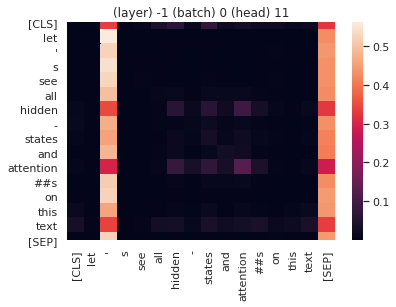

In [7]:
for i in range(12):

    visual_atn_matrix(tokens, attentions, layer_num=-1, head_num=i)  # print attention matrix of every head in the last layer
    plt.show()